## Comparisons of different models for default on prediction

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy: 0.8024280399451733
Logistic Regression Accuracy: 0.8848247503426669

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     67681
           1       0.20      0.24      0.22      8924

    accuracy                           0.80     76605
   macro avg       0.55      0.56      0.55     76605
weighted avg       0.82      0.80      0.81     76605


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.59      0.04      0.07      8924

    accuracy                           0.88     76605
   macro avg       0.74      0.52      0.51     76605
weighted avg       0.85      0.88      0.84     76605



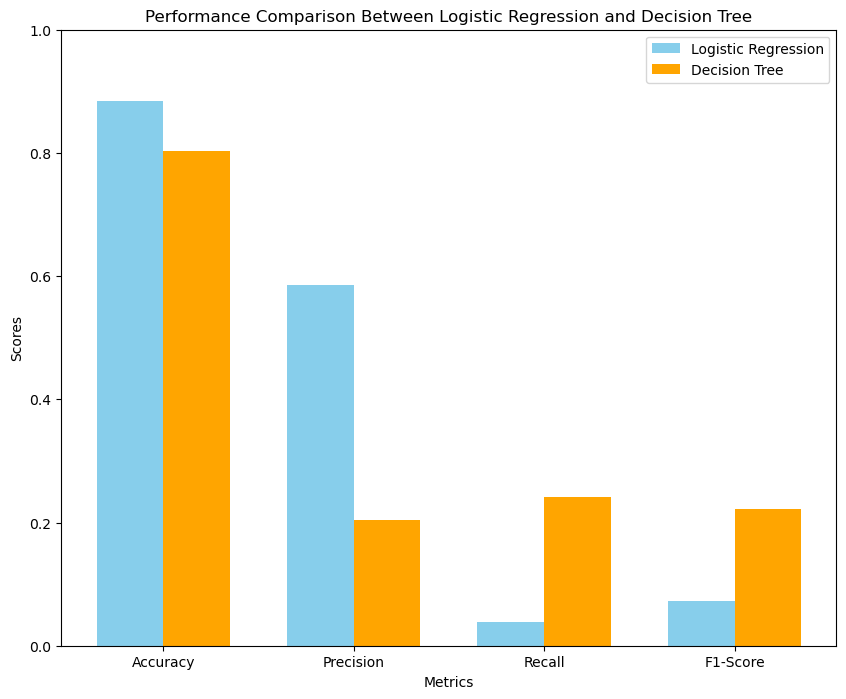

In [11]:
import pandas as pd
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

client = MongoClient("mongodb://localhost:27017/")
db = client["p2p_lending"]

data_set = db["default"]

data1 = list(data_set.find())

df = pd.DataFrame(data1)
# Encode categorical features using label encoders
categorical_columns = ['education', 'emp_type', 'has_dependents', 'purpose', 'has_co_signer']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable for the models
X = df.drop(columns=['_id', 'default'])
y = df['default']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the models under consideration
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression(max_iter=1000)

decision_tree.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)


# Make predictions on the models
y_pred_dt = decision_tree.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)


# Display model's accuracy score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


# Display the Classification report for the models
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


# Evaluate model's performace metrics
metrics_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
bar_width = 0.35
index = np.arange(len(metrics_names))


# Calculate metrics for both models
logistic_metrics = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr)
]
decision_tree_metrics = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt)
]


# Plot bar graph for both models
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.bar(index, logistic_metrics, bar_width, label='Logistic Regression', color='skyblue')
bar2 = ax.bar(index + bar_width, decision_tree_metrics, bar_width, label='Decision Tree', color='orange')
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Performance Comparison Between Logistic Regression and Decision Tree")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1)
ax.legend()
plt.show()